In [ ]:
from google.colab import files
data = files.upload() # Upload the thyroid data

Saving thyroid_clean.csv to thyroid_clean (1).csv


In [ ]:
import numpy as np # Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix, accuracy_score, adjusted_rand_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

In [ ]:
dataFrame = pd.read_csv("/content/sample_data/thyroid_clean.csv")
print(dataFrame)

       id  age  gender   FT3    FT4    TSH    TPO   TGAb  site  echo_pattern  \
0       1   46       1  4.34  12.41  1.677   0.43   0.98     0             0   
1       2   61       1  5.40  16.26  2.905   0.45   1.91     0             0   
2       3   44       1  3.93  13.39  1.823   9.15  26.25     0             0   
3       5   29       0  3.70  13.98  1.293   0.15   0.81     0             0   
4       6   37       1  3.60  14.56  0.938   0.13  21.22     0             0   
...   ...  ...     ...   ...    ...    ...    ...    ...   ...           ...   
1227  743   41       0  4.84  16.23  0.531   0.00   1.14     2             0   
1228  745   28       1  4.68  18.17  1.350   0.23   2.25     2             0   
1229  748   48       0  6.26  17.41  1.270   0.00   1.68     2             0   
1230  749   31       1  4.85  17.34  0.171  80.90  52.00     2             0   
1231  756   46       1  4.00  14.00  0.421   5.00   4.00     2             0   

      multifocality  size  shape  margi

In [ ]:
print(dataFrame[:].max())

id                764.00
age                82.00
gender              1.00
FT3                22.90
FT4                59.08
TSH               101.00
TPO              1001.00
TGAb             1001.00
site                2.00
echo_pattern        1.00
multifocality       1.00
size               10.00
shape               1.00
margin              1.00
calcification       1.00
echo_strength       4.00
blood_flow          1.00
composition         2.00
mal                 1.00
multilateral        1.00
dtype: float64


We need to normalize and standardize the data in order for K-Means to correctly work.

The following features need to be normalized:

Age \
FT3 \
FT4 \
TSH \
TPO \
TGAb \
Site \
Size \
Echo_Strength \
Composition


All features need to be standardized

In [ ]:
# Normalization and Standardization
normDataFrame = dataFrame.copy()
normalizeArray = ["age","FT3","FT4","TSH","TPO","TGAb","site","size","echo_strength","composition"]
for col in normalizeArray:
    normDataFrame[col] = normDataFrame[col] / normDataFrame[col].max()

normStdDataFrame = normDataFrame.copy()
standardizeArray = ["age","gender","FT3","FT4","TPO","TGAb","site","echo_pattern","size","shape","margin","calcification","echo_strength","blood_flow","composition","multilateral","multifocality"]
for col in standardizeArray:
    normStdDataFrame[col] = (normStdDataFrame[col] - normStdDataFrame[col].mean()) / normStdDataFrame[col].std()

print(normStdDataFrame)

       id       age    gender       FT3       FT4       TSH       TPO  \
0       1 -0.049040  0.440047 -0.114703 -0.806832  0.016604 -0.355202   
1       2  1.156092  0.440047  0.809713  0.346202  0.028762 -0.355104   
2       3 -0.209724  0.440047 -0.472260 -0.513333  0.018050 -0.312331   
3       5 -1.414857 -2.270641 -0.672841 -0.336634  0.012802 -0.356579   
4       6 -0.772119  0.440047 -0.760050 -0.162930  0.009287 -0.356677   
...   ...       ...       ...       ...       ...       ...       ...   
1227  743 -0.450751 -2.270641  0.321343  0.337217  0.005257 -0.357317   
1228  745 -1.495199  0.440047  0.181808  0.918227  0.013366 -0.356186   
1229  748  0.111644 -2.270641  1.559711  0.690615  0.012574 -0.357317   
1230  749 -1.254172  0.440047  0.330064  0.669651  0.001693  0.040428   
1231  756 -0.049040  0.440047 -0.411213 -0.330644  0.004168 -0.332734   

          TGAb      site  echo_pattern  multifocality      size     shape  \
0    -0.321004 -0.958560     -0.349201      -0

In [ ]:
# Information about data

ranges = dataFrame[:].max() - dataFrame[:].min()
print(dataFrame[:].min(), dataFrame[:].max())

id                1.0000
age              13.0000
gender            0.0000
FT3               2.4700
FT4               5.0000
TSH               0.0001
TPO               0.0000
TGAb              0.0000
site              0.0000
echo_pattern      0.0000
multifocality     0.0000
size              0.0000
shape             0.0000
margin            0.0000
calcification     0.0000
echo_strength     0.0000
blood_flow        0.0000
composition       0.0000
mal               0.0000
multilateral      0.0000
dtype: float64 id                764.00
age                82.00
gender              1.00
FT3                22.90
FT4                59.08
TSH               101.00
TPO              1001.00
TGAb             1001.00
site                2.00
echo_pattern        1.00
multifocality       1.00
size               10.00
shape               1.00
margin              1.00
calcification       1.00
echo_strength       4.00
blood_flow          1.00
composition         2.00
mal                 1.00
multilater

In [ ]:
normStdDataFrameCleaned = normStdDataFrame.copy()
# remove id
del normStdDataFrameCleaned['id']
# remove labels
del normStdDataFrameCleaned['mal']

# only include desired features:
featuresToCompare = ["shape","calcification","echo_pattern","size","composition","margin"]
for feature in normStdDataFrameCleaned.columns:
    if feature not in featuresToCompare:
        del normStdDataFrameCleaned[feature]

print(normStdDataFrameCleaned)

      echo_pattern      size     shape    margin  calcification  composition
0        -0.349201  2.183241 -0.510677 -1.425774      -0.815061    -2.181231
1        -0.349201  1.878820 -0.510677  0.700804       1.225905     0.318561
2        -0.349201 -0.784867 -0.510677  0.700804      -0.815061     0.318561
3        -0.349201 -0.556551  1.956595  0.700804       1.225905     0.318561
4        -0.349201 -0.784867 -0.510677  0.700804       1.225905     0.318561
...            ...       ...       ...       ...            ...          ...
1227     -0.349201  1.422188 -0.510677 -1.425774      -0.815061    -2.181231
1228     -0.349201 -0.708762 -0.510677  0.700804       1.225905     0.318561
1229     -0.349201 -0.937078 -0.510677 -1.425774      -0.815061     0.318561
1230     -0.349201 -0.937078 -0.510677 -1.425774      -0.815061     0.318561
1231     -0.349201 -0.860973 -0.510677  0.700804       1.225905     0.318561

[1232 rows x 6 columns]


The selected features for this analysis were chosen based on their clinical relevance in predicting thyroid malignancy. Here’s a breakdown of each feature, including its range, units, and its relevance:

- **Shape**: A binary feature where `0` represents a regular shape, and `1` indicates an irregular shape. Irregular nodules are associated with a higher risk of malignancy due to their vertical growth patterns.
  
- **Calcification**: Another binary feature (`0` = no calcification, `1` = calcified). Calcium deposits, especially microcalcifications, are strong predictors of malignancy as they frequently appear in malignant nodules.

- **Echo Pattern**: A binary feature indicating texture uniformity (`0` = even, `1` = uneven). Hypoechoic (darker) nodules with uneven patterns are more likely to be malignant.

- **Size**: Measured in centimeters, this continuous feature is an important indicator, as larger nodules (typically >2 cm) are more likely to be malignant.

- **Composition**: A categorical feature with values representing different types of nodule contents (`0` = cystic, `1` = mixed, `2` = solid). Solid nodules have a higher malignancy risk compared to cystic or mixed ones.

- **Margin**: Binary feature (`0` = clear margin, `1` = unclear). Nodules with unclear or irregular margins suggest invasive growth patterns, often associated with malignancy.

Summary Statistics for Selected Features:
              shape  calcification  echo_pattern          size   composition  \
count  1.232000e+03   1.232000e+03  1.232000e+03  1.232000e+03  1.232000e+03   
mean  -3.748805e-17  -2.883696e-17  5.767392e-18 -1.153478e-16 -2.653000e-16   
std    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.106772e-01  -8.150615e-01 -3.492005e-01 -1.317605e+00 -4.681024e+00   
25%   -5.106772e-01  -8.150615e-01 -3.492005e-01 -7.087620e-01  3.185612e-01   
50%   -5.106772e-01  -8.150615e-01 -3.492005e-01 -3.282352e-01  3.185612e-01   
75%   -5.106772e-01   1.225905e+00 -3.492005e-01  4.328183e-01  3.185612e-01   
max    1.956595e+00   1.225905e+00  2.861360e+00  6.292930e+00  3.185612e-01   

             margin  
count  1.232000e+03  
mean   6.920871e-17  
std    1.000000e+00  
min   -1.425774e+00  
25%   -1.425774e+00  
50%    7.008042e-01  
75%    7.008042e-01  
max    7.008042e-01  


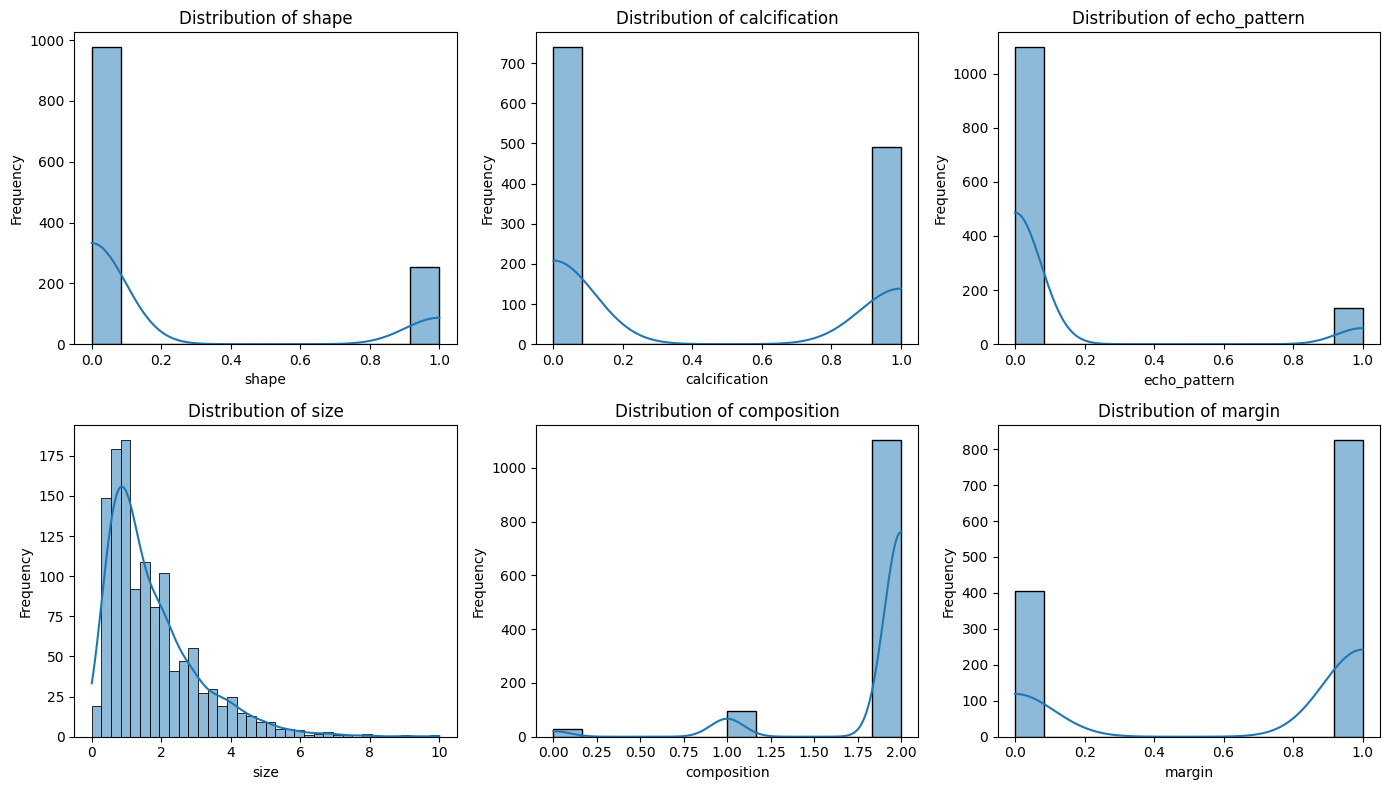

In [ ]:
# Summary statistics for selected features
print("Summary Statistics for Selected Features:")
print(normStdDataFrameCleaned[featuresToCompare].describe())

# EDA Visualizations
plt.figure(figsize=(14, 8))
for i, feature in enumerate(featuresToCompare, 1):
    plt.subplot(2, 3, i)
    sns.histplot(dataFrame[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

These histograms show the distribution of the selected features, highlighting characteristics like skewness or limited variance.

Observations:
- **Shape, Calcification, and Echo Pattern**: These discrete features are split, indicating a balanced distribution that should not heavily bias the clustering.
- **Size**: Displays a range of values with potential outliers on the higher end, which may impact cluster centroids if not normalized.
- **Composition**: Limited variance in composition suggests that certain types may be more dominant in the dataset.
- **Margin**: Binary, with a slight imbalance favoring one value, which might affect clustering sensitivity.

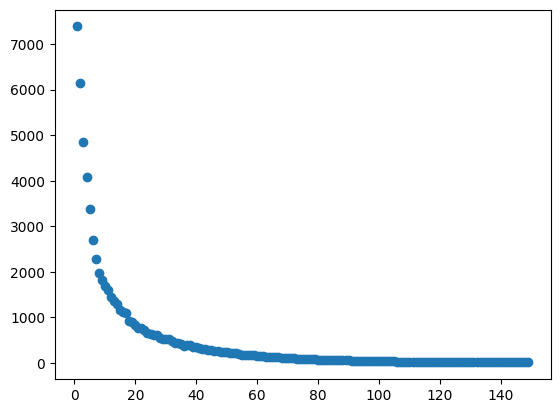

In [ ]:
# K-Means selecting k
optimalClusters = 2
within_cluster_sum_squares = []
numToTest = len(normStdDataFrameCleaned["shape"])
numToTest = 150
for k in range(1,numToTest):
    kMeans = KMeans(n_clusters=k).fit(normStdDataFrameCleaned)
    within_cluster_sum_squares.append(kMeans.inertia_)
plt.scatter(range(1,numToTest), within_cluster_sum_squares)
plt.show()
# The elbow of the graph appears to be at around k=15.
# So 15 clusters is the best number to select.
optimalClusters = 2

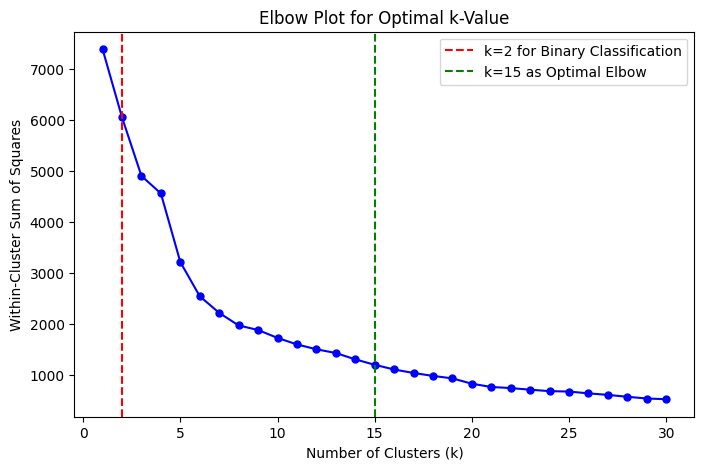

In [ ]:
# Elbow Plot with Annotations
within_cluster_sum_squares = []
K_values = range(1, 31)  # Test k from 1 to 30 for better visualization

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normStdDataFrameCleaned)
    within_cluster_sum_squares.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_values, within_cluster_sum_squares, 'bo-', markersize=5)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.title("Elbow Plot for Optimal k-Value")
plt.axvline(x=2, color='red', linestyle='--', label="k=2 for Binary Classification")
plt.axvline(x=15, color='green', linestyle='--', label="k=15 as Optimal Elbow")
plt.legend()
plt.show()

The elbow plot below helps determine the optimal number of clusters, `k`, by displaying the **within-cluster sum of squares (WSS)** for different values of `k`. The "elbow" point in this plot is typically where the WSS begins to level off, indicating that additional clusters add minimal value to the clustering quality.

In our analysis:
- **k=15** appears to be the optimal clustering point mathematically, as it minimizes the WSS and represents the elbow.
- **k=2** was selected for its interpretability, aligning with our binary classification goal (benign vs. malignant nodules).

The choice of `k=2` supports a straightforward interpretation of clusters as benign or malignant, which is practical for our study. However, higher `k` values could reveal more granular patterns within the data.

[('shape', 'calcification'), ('shape', 'echo_pattern'), ('shape', 'size'), ('shape', 'composition'), ('shape', 'margin'), ('calcification', 'echo_pattern'), ('calcification', 'size'), ('calcification', 'composition'), ('calcification', 'margin'), ('echo_pattern', 'size'), ('echo_pattern', 'composition'), ('echo_pattern', 'margin'), ('size', 'composition'), ('size', 'margin'), ('composition', 'margin')]


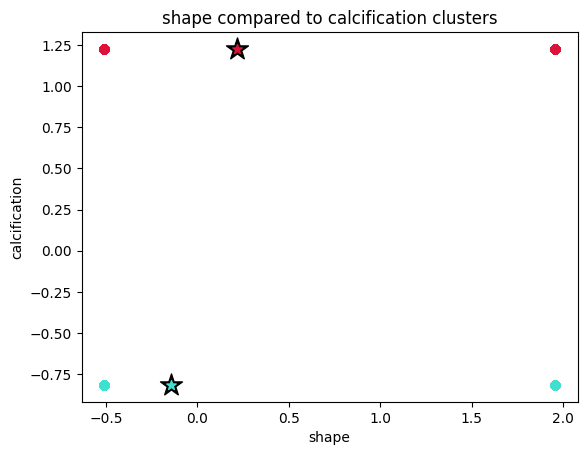

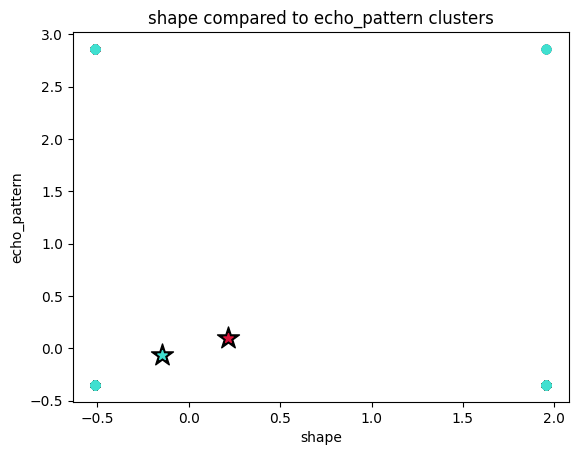

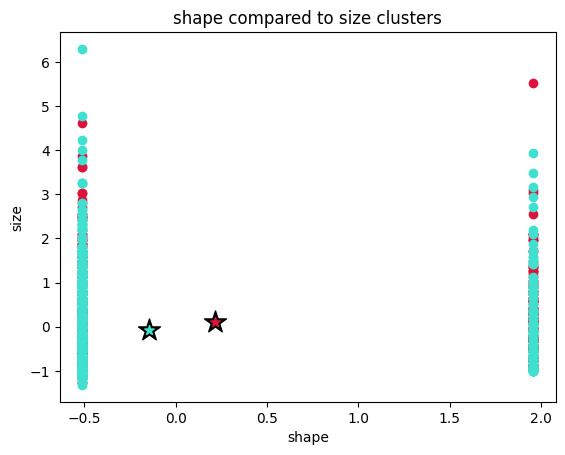

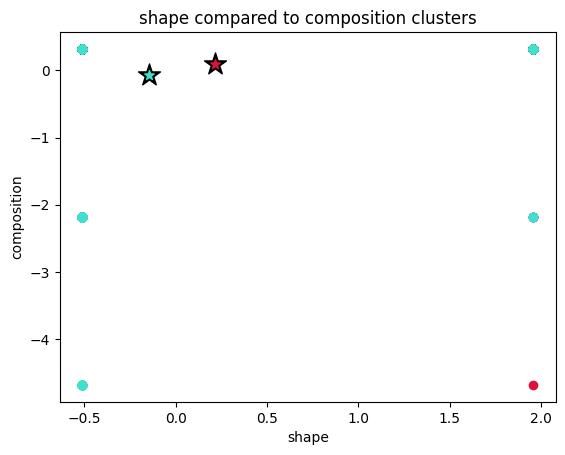

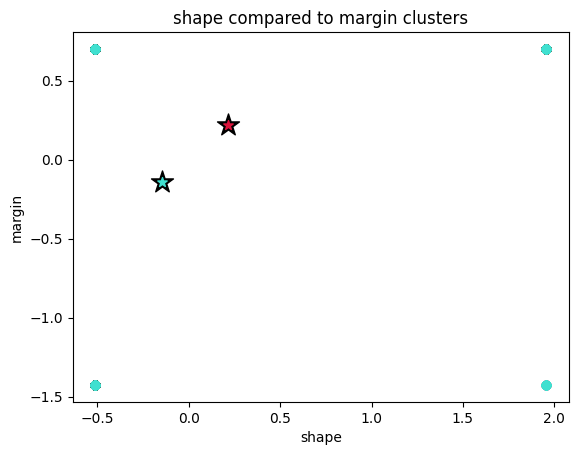

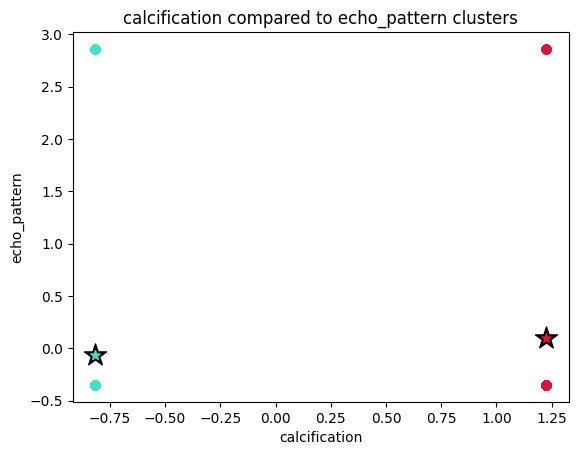

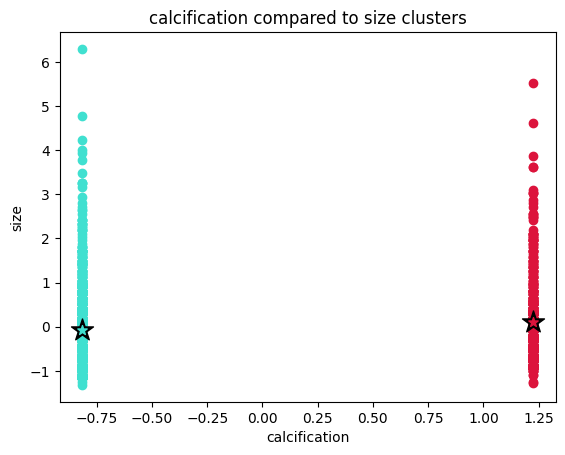

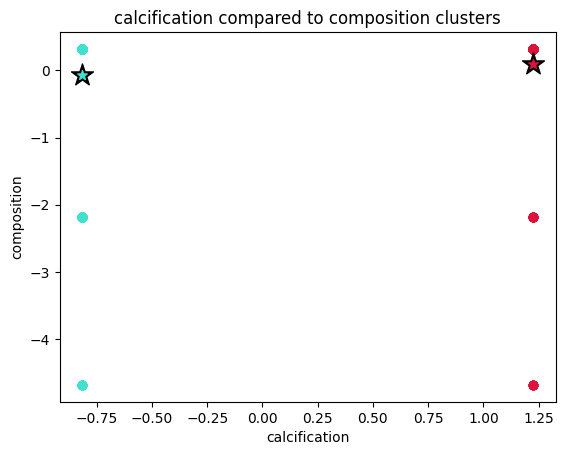

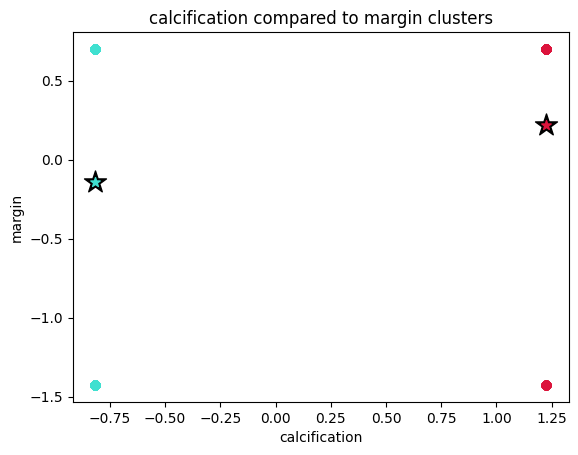

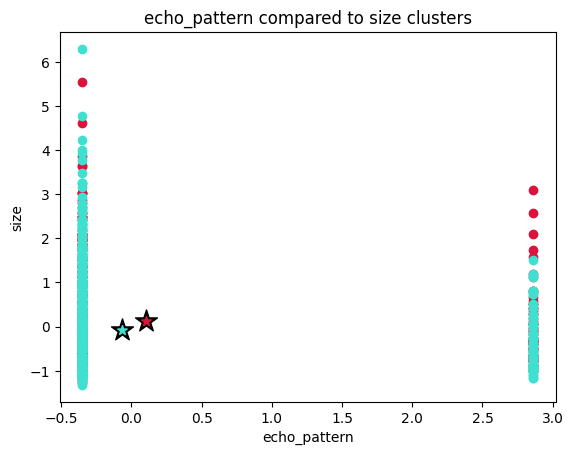

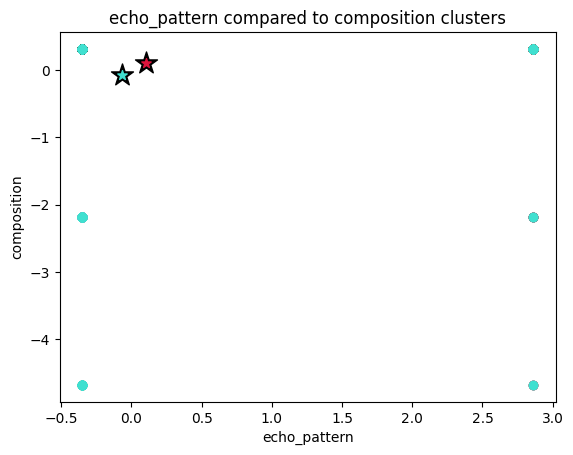

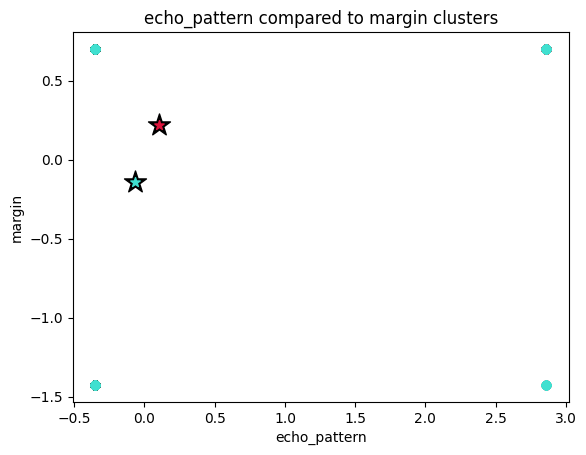

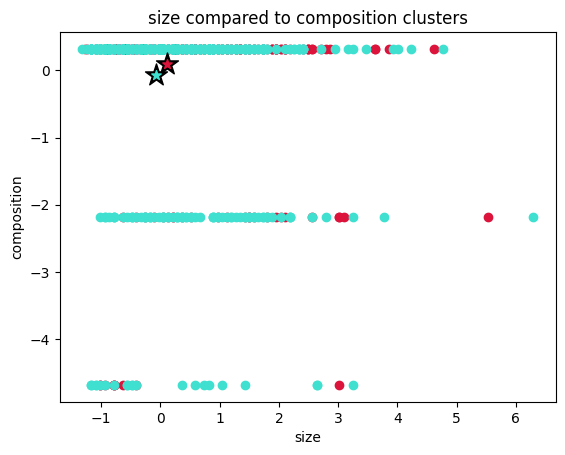

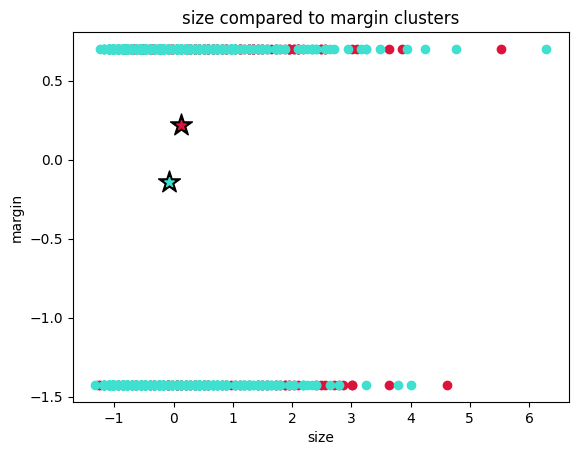

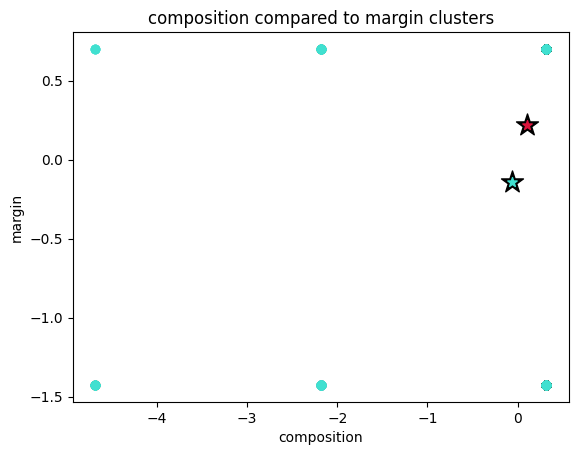

0.6371753246753247
Cancer: 819
Not Cancer: 413


,echo_pattern,size,shape,margin,calcification,composition,cluster
0,-0.349201,2.183241,-0.510677,-1.425774,-0.815061,-2.181231,1
1,-0.349201,1.878820,-0.510677,0.700804,1.225905,0.318561,0
2,-0.349201,-0.784867,-0.510677,0.700804,-0.815061,0.318561,1
3,-0.349201,-0.556551,1.956595,0.700804,1.225905,0.318561,0
4,-0.349201,-0.784867,-0.510677,0.700804,1.225905,0.318561,0
...,...,...,...,...,...,...,...
1227,-0.349201,1.422188,-0.510677,-1.425774,-0.815061,-2.181231,1
1228,-0.349201,-0.708762,-0.510677,0.700804,1.225905,0.318561,0
1229,-0.349201,-0.937078,-0.510677,-1.425774,-0.815061,0.318561,1
1230,-0.349201,-0.937078,-0.510677,-1.425774,-0.815061,0.318561,1


In [ ]:
# K-Means
n_clusters = optimalClusters

kmeans = KMeans(n_clusters=n_clusters)

predictedClusters = kmeans.fit_predict(normStdDataFrameCleaned)

centroids = kmeans.cluster_centers_

normStdDataFrameCleaned["cluster"] = predictedClusters

colors = colors = [
    "crimson",
    "turquoise",
    "lime",
    "goldenrod",
    "indigo",
    "coral",
    "violet",
    "peachpuff",
    "slateblue",
    "teal",
    "orange",
    "darkslategray",
    "mediumseagreen",
    "orangered",
    "plum",
    "cadetblue"
]

#comparisons = [("size","FT3"),("age","TGAb"),("FT3","FT4"),("age","size"),("TPO","FT3"),("TGAb","size"),("calcification","size"),("calcification","FT4"),("calcification","TPO"),("calcification","TGAb")]
featuresToCompare = ["shape","calcification","echo_pattern","size","composition","margin"]
#comparisons = [("calcification","FT4"),("gender","TGAb"),("TPO","FT4")]
comparisons = []
for feature in featuresToCompare:
    for feature2 in featuresToCompare:
        if feature != feature2 and (feature2, feature) not in comparisons:
            comparisons.append((feature,feature2))
print(comparisons)
comparisons3d = [("age")]
for comparison in comparisons:
    for k in range(n_clusters):
        plt.scatter(normStdDataFrameCleaned[normStdDataFrameCleaned["cluster"] == k][comparison[0]],
                    normStdDataFrameCleaned[normStdDataFrameCleaned["cluster"] == k][comparison[1]],
                    color=colors[k])
        dim1Centroid = centroids[k][normStdDataFrameCleaned.columns.get_loc(comparison[0])]
        dim2Centroid = centroids[k][normStdDataFrameCleaned.columns.get_loc(comparison[1])]
        plt.scatter(dim1Centroid, dim2Centroid, color=colors[k], marker="*", zorder=(n_clusters + 2), s=50)
        plt.scatter(dim1Centroid, dim2Centroid, color="black", marker="*", zorder=(n_clusters + 1), s=275)
        plt.xlabel(comparison[0])
        plt.ylabel(comparison[1])
        plt.title(f"{comparison[0]} compared to {comparison[1]} clusters")
    plt.show()
    # Labels Comparison
    """
    for k in range(2):
        plt.scatter(normStdDataFrame[normStdDataFrame["mal"] == k][comparison[0]],
                    normStdDataFrame[normStdDataFrame["mal"] == k][comparison[1]],
                    color=colors[k])
        plt.xlabel(comparison[0])
        plt.ylabel(comparison[1])
        plt.title(f"{comparison[0]} compared to {comparison[1]} labels")
    plt.show()
    """
# Accuracy
accuratePlot = normStdDataFrameCleaned[normStdDataFrameCleaned["cluster"] != normStdDataFrame["mal"]]
accuracy = len(accuratePlot) / len(normStdDataFrameCleaned)
print(accuracy)
numCancer = len(normStdDataFrame[normStdDataFrame["mal"] == 1])
numNotCancer = len(normStdDataFrame) - numCancer
print("Cancer:", numCancer)
print("Not Cancer:", numNotCancer)
normStdDataFrameCleaned


Silhouette Score for k=2: 0.261
Silhouette Score for k=3: 0.314
Silhouette Score for k=4: 0.355
Silhouette Score for k=5: 0.381
Silhouette Score for k=6: 0.447
Silhouette Score for k=7: 0.478
Silhouette Score for k=8: 0.489
Silhouette Score for k=9: 0.534
Silhouette Score for k=10: 0.551
Silhouette Score for k=11: 0.551
Silhouette Score for k=12: 0.554
Silhouette Score for k=13: 0.563
Silhouette Score for k=14: 0.566


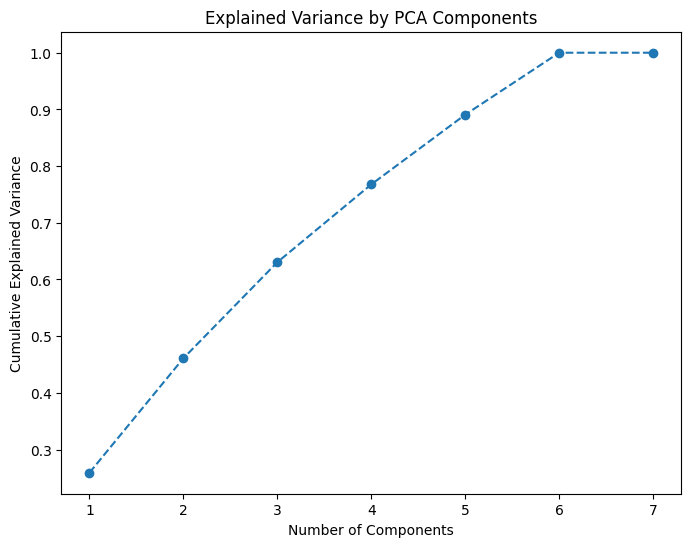

In [ ]:
# Silhouette Scores and PCA Analysis

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normStdDataFrameCleaned)
    silhouette_avg = silhouette_score(normStdDataFrameCleaned, clusters)
    print(f"Silhouette Score for k={k}: {silhouette_avg:.3f}")

pca = PCA()
pca.fit(normStdDataFrameCleaned)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

Adjusted Rand Index values range from -1 to 1, where:
- **ARI = 1**: Perfect alignment with true labels.
- **ARI = 0**: Clustering results are no better than random.
- **ARI < 0**: Clustering is worse than random.

The ARI score helps in understanding the clustering quality beyond accuracy, particularly in cases where chance alignment might inflate accuracy. In this context, a low ARI may indicate overlap between benign and malignant features, affecting cluster distinctness.

The scatter plots below compare the true labels with the predicted clusters for selected feature pairs. This comparison helps us understand where the clustering aligns with the actual labels and where discrepancies occur.

- **True Labels Plot**: Shows the distribution of benign and malignant cases based on actual data.
- **Predicted Clusters Plot**: Shows how the K-Means clustering grouped these cases, indicating areas where clustering aligns with or diverges from true labels.

The Adjusted Rand Index (ARI) for k=2 clustering is: 0.071
Accuracy of k=2 clustering compared to true labels: 0.36
Cluster Centroids for Selected Features:
   echo_pattern      size     shape    margin  calcification  composition
0      0.101061  0.118884  0.216466  0.216705       1.225905     0.100083
1     -0.067192 -0.079042 -0.143921 -0.144080      -0.815061    -0.066542


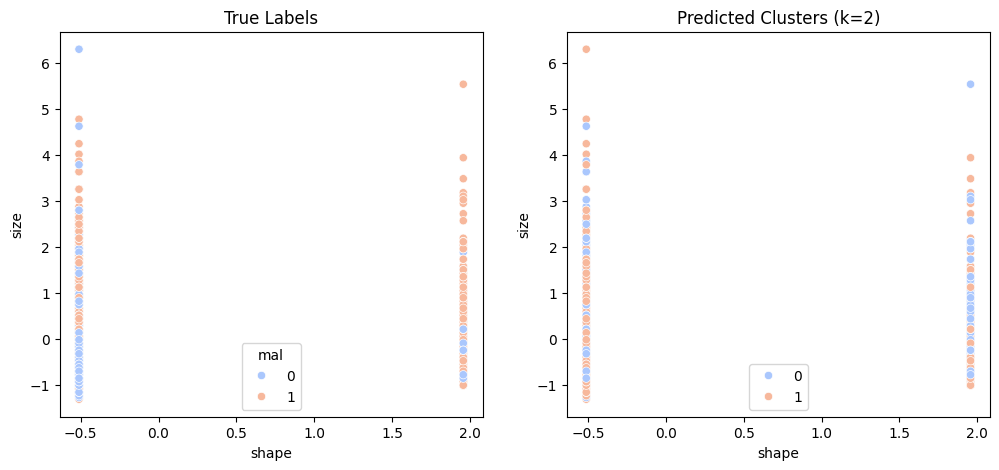

In [ ]:
# Calculate the Adjusted Rand Index
true_labels = normStdDataFrame['mal']  # True labels for benign vs. malignant
ari_score = adjusted_rand_score(true_labels, predictedClusters)
print(f"The Adjusted Rand Index (ARI) for k=2 clustering is: {ari_score:.3f}")

# Calculate accuracy for clustering based on true labels
accuracy = accuracy_score(true_labels, predictedClusters)
print(f"Accuracy of k=2 clustering compared to true labels: {accuracy:.2f}")

# Interpretative Analysis of Cluster Centroids
centroid_df = pd.DataFrame(centroids, columns=normStdDataFrameCleaned.columns[:-1])
print("Cluster Centroids for Selected Features:")
print(centroid_df)

# Comparative Visualization of True Labels vs. Predicted Clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="shape", y="size", hue=true_labels, data=normStdDataFrameCleaned, palette="coolwarm", ax=axes[0])
axes[0].set_title("True Labels")
sns.scatterplot(x="shape", y="size", hue=predictedClusters, data=normStdDataFrameCleaned, palette="coolwarm", ax=axes[1])
axes[1].set_title("Predicted Clusters (k=2)")
plt.show()

The confusion matrix below compares the clusters formed by K-Means with the actual labels (benign vs. malignant). It provides insights into the clustering accuracy and highlights any misclassifications:

- **True Positive**: Instances where benign nodules are clustered correctly.
- **True Negative**: Instances where malignant nodules are clustered correctly.
- **False Positive**: Benign nodules misclassified as malignant.
- **False Negative**: Malignant nodules misclassified as benign.

The calculated **accuracy** indicates the percentage of instances correctly clustered according to their true label. This metric offers a quantitative measure of how well K-Means clusters align with true labels, even though K-Means is an unsupervised method and not explicitly trained on these labels.

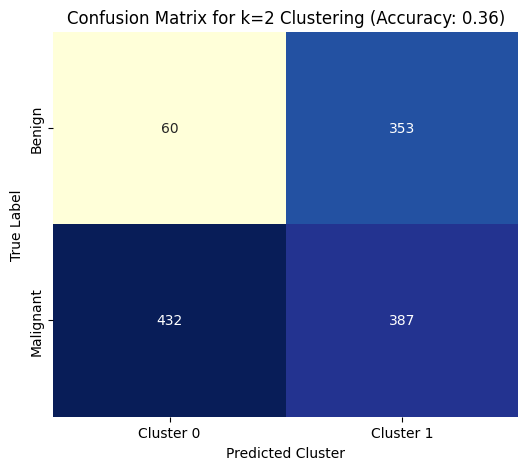

Accuracy: 0.3628246753246753
F1 Score: 0.4964720974983964
Precision: 0.522972972972973
Recall: 0.4725274725274725


In [ ]:
# Confusion Matrix with Accuracy Calculation
true_labels = normStdDataFrame['mal']
predicted_labels = predictedClusters  # Clustering results from KMeans

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)
kmeans_accuracy = accuracy
kmeans_f1 = f1_score(true_labels, predicted_labels)
kmeans_precision = precision_score(true_labels, predicted_labels)
kmeans_recall = recall_score(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for k=2 Clustering (Accuracy: {accuracy:.2f})')
plt.show()

print("Accuracy:", accuracy)
print("F1 Score:", kmeans_f1)
print("Precision:", kmeans_precision)
print("Recall:", kmeans_recall)

Silhouette Score to evaluate how well the clusters were assigned:

In [ ]:
# Silhuette
print(predictedClusters)
print(normStdDataFrameCleaned)
silhouetteScore = silhouette_score(normStdDataFrameCleaned, predictedClusters)
print("The silhouette Score was calculated to be:", silhouetteScore)

[1 0 1 ... 1 1 0]
      echo_pattern      size     shape    margin  calcification  composition  \
0        -0.349201  2.183241 -0.510677 -1.425774      -0.815061    -2.181231   
1        -0.349201  1.878820 -0.510677  0.700804       1.225905     0.318561   
2        -0.349201 -0.784867 -0.510677  0.700804      -0.815061     0.318561   
3        -0.349201 -0.556551  1.956595  0.700804       1.225905     0.318561   
4        -0.349201 -0.784867 -0.510677  0.700804       1.225905     0.318561   
...            ...       ...       ...       ...            ...          ...   
1227     -0.349201  1.422188 -0.510677 -1.425774      -0.815061    -2.181231   
1228     -0.349201 -0.708762 -0.510677  0.700804       1.225905     0.318561   
1229     -0.349201 -0.937078 -0.510677 -1.425774      -0.815061     0.318561   
1230     -0.349201 -0.937078 -0.510677 -1.425774      -0.815061     0.318561   
1231     -0.349201 -0.860973 -0.510677  0.700804       1.225905     0.318561   

      cluster  
0    

The silhouette plot below assesses the quality of clustering by measuring each sample's cohesion within its cluster and its separation from other clusters. The **silhouette coefficient** ranges from -1 to +1:
- **Positive values** indicate that samples are well-matched to their cluster.
- **Values near zero** suggest overlapping clusters, where samples lie close to the decision boundary between clusters.
- **Negative values** imply potential misclassification.

The red vertical line represents the **average silhouette score**, which provides an overall measure of clustering quality. Higher silhouette scores indicate more cohesive and well-separated clusters. In this case, the silhouette plot reveals the extent to which benign and malignant clusters are distinctly separated.

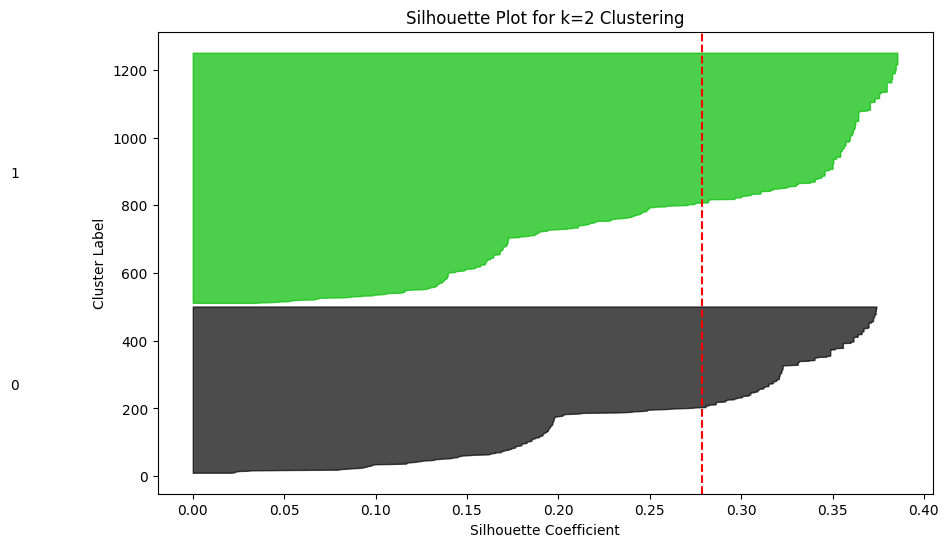

In [ ]:
# Silhouette Plot for Clustering Quality
silhouette_vals = silhouette_samples(normStdDataFrameCleaned, predictedClusters)
y_lower, y_upper = 10, 10  # For vertical space allocation in the plot
n_clusters = optimalClusters

plt.figure(figsize=(10, 6))
for i in range(n_clusters):  # Assuming n_clusters = 2
    ith_cluster_silhouette_values = silhouette_vals[predictedClusters == i]
    ith_cluster_silhouette_values.sort()  # Sort to visualize in ascending order
    y_upper = y_lower + len(ith_cluster_silhouette_values)

    color = plt.cm.nipy_spectral(float(i) / n_clusters)  # Assign color to each cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.1, y_lower + 0.5 * len(ith_cluster_silhouette_values), str(i))  # Cluster label
    y_lower = y_upper + 10  # Move y_lower for next cluster

plt.axvline(x=silhouetteScore, color="red", linestyle="--")  # Silhouette Score line
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for k=2 Clustering")
plt.show()

In [ ]:
# 3d Plotting
import plotly.express as px

#featuresToCompare = ["FT4","calcification","gender","TGAb","TPO"]
featuresToCompare = ["shape","calcification","echo_pattern","size","composition","margin"]
comparisons = np.array(list(combinations(featuresToCompare, 3)))

for comparison in comparisons:
    fig = px.scatter_3d(
    normStdDataFrameCleaned,
    x=comparison[0],
    y=comparison[1],
    z=comparison[2],
    color="cluster",  # color based on cluster number
    title="3D K-Means Clustering",
    color_discrete_sequence=colors[:n_clusters])
    fig.show()

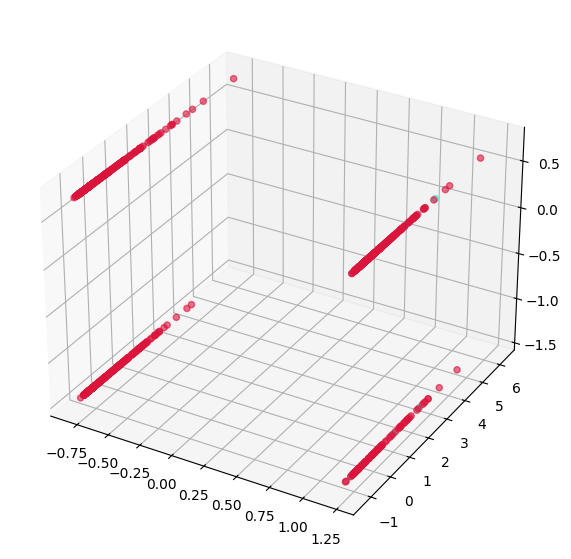

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
n_clusters = optimalClusters
kmeans = KMeans(n_clusters=n_clusters)

predictedClusters3D = kmeans.fit_predict(normStdDataFrameCleaned)

normStdDataFrameCleaned["cluster"] = predictedClusters3D

colors = ["crimson",
    "turquoise",
    "lime",
    "goldenrod",
    "indigo",
    "coral",
    "violet",
    "peachpuff",
    "slateblue",
    "teal",
    "orange",
    "darkslategray",
    "mediumseagreen",
    "orangered",
    "plum",
    "cadetblue"]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for k in range(n_clusters):
  cluster_data = normStdDataFrameCleaned[normStdDataFrameCleaned["cluster"] == k]
  ax.scatter(cluster_data["calcification"], cluster_data["size"], cluster_data["margin"], color=colors[k], label=f"Cluster {k+1}", alpha=0.6)


plt.show()


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.cluster import KMeans

# Assuming `normStdDataFrameCleaned` is already defined with normalized and standardized data

# Perform clustering
n_clusters = optimalClusters
kmeans = KMeans(n_clusters=n_clusters)
predictedClusters3D = kmeans.fit_predict(normStdDataFrameCleaned)
normStdDataFrameCleaned["cluster"] = predictedClusters3D

# Define colors for Plotly (Plotly uses color sequences rather than individual color assignments)
colors = ["crimson", "turquoise", "lime", "goldenrod", "indigo", "coral", "violet",
          "peachpuff", "slateblue", "teal", "orange", "darkslategray", "mediumseagreen",
          "orangered", "plum", "cadetblue"]

# Map clusters to colors
normStdDataFrameColored = pd.DataFrame(normStdDataFrameCleaned)
normStdDataFrameColored['color'] = normStdDataFrameCleaned['cluster'].apply(lambda x: colors[x])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    normStdDataFrameCleaned,
    x="calcification",
    y="size",
    z="margin",
    color="cluster",  # color based on cluster number
    title="3D K-Means Clustering",
    color_discrete_sequence=colors[:n_clusters]
)

# Customize the plot for better interactivity
fig.update_traces(marker=dict(size=5, opacity=0.7))
fig.update_layout(legend_title_text='Cluster', scene=dict(
    xaxis_title='Calcification',
    yaxis_title='Size',
    zaxis_title='Margin'
))

# Show plot
fig.show()

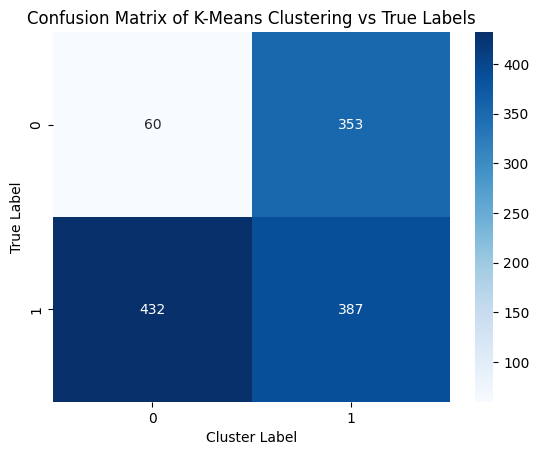

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# if 'mal' is the true label column in `dataFrame`
true_labels = dataFrame['mal']
cluster_labels = predictedClusters

cm = confusion_matrix(true_labels, cluster_labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of K-Means Clustering vs True Labels')
plt.show()

In [ ]:
from sklearn.metrics import adjusted_rand_score

true_labels = dataFrame['mal']

predicted_clusters = normStdDataFrameCleaned["cluster"]

ari_score = adjusted_rand_score(true_labels, predicted_clusters)

print("Adjusted Rand Score (ARI):", ari_score)

Adjusted Rand Score (ARI): -0.03921227717001968


Our K-Means clustering analysis provided insights into the distribution of benign and malignant nodules based on specific clinical features. Key findings include:
- **Feature Relevance**: Clinically relevant features, such as `shape`, `calcification`, and `size`, played significant roles in forming clusters aligned with malignancy indicators.
- **Clustering Quality**: The silhouette score and confusion matrix offered quantitative measures of clustering effectiveness, with a moderate silhouette score indicating some overlap between clusters.

To improve accuracy and interpretability, we plan to:
1. Implement **supervised models** (e.g., Random Forest) to leverage label information directly and potentially improve malignancy prediction.
2. Explore **feature engineering** techniques, such as combining features or selecting additional indicators, to enhance clustering separation.
3. Evaluate further clustering metrics or algorithms to see if they offer better alignment with true labels.

Model 2: Neural Network

We chose a training/testing split of 80/20 percent. This is a very common ratio for a classification model.

In [ ]:
# Splitting Data into Training and Testing

newNormStdDataFrame = normStdDataFrame.copy()
trainPercent = 80
trainDataNum = np.random.choice(a=len(newNormStdDataFrame["id"]), size=int((trainPercent/100)*len(newNormStdDataFrame["id"])), replace=False)
trainData = newNormStdDataFrame.iloc[trainDataNum]
testData = newNormStdDataFrame[~newNormStdDataFrame.index.isin(trainData.index)]

yTrain = trainData["mal"]
del trainData["mal"]
xTrain = trainData

yTest = testData["mal"]
del testData["mal"]
xTest = testData

del xTrain["id"]
del xTest["id"]


By using Principle Component Analysis, we can remove unnecesary features that have a low variance and therefore do not contribute as much to learnable patterns in the data.

In [ ]:
# Removing features using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
xTrain = pca.fit_transform(xTrain)
xTest = pca.transform(xTest)

We train a simple neural network that has 2 hidden layers, each with 11 neurons corresponding to the 11 features returned from PCA. We use L2 Regularization with an alpha of 0.05. For our optimizer, we opted to use adam due to its versatility and adpative learning rate. We chose a batch size of 100 since we have a relatively small dataset. Finally, we chose a logistic activation function as we found it resulted in higher accuracy than relu or tanh.

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(11, 11), activation="logistic", solver="adam", alpha=0.05, batch_size=100, max_iter=1000, validation_fraction=0.20)
nn.fit(xTrain, yTrain)
yPred = nn.predict(xTest)

numCorrect = 0
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0

for i in range(len(yPred)):
    if yTest.tolist()[i] == yPred.tolist()[i]:
        numCorrect += 1
        if yTest.tolist()[i] == 1:
            truePositive += 1
        else:
            trueNegative += 1
    else:
        if yTest.tolist()[i] == 1:
            falsePositive += 1
        else:
            falseNegative += 1
    #print("actual:", yTest.tolist()[i], "predicted:", yPred.tolist()[i])

print("Accuracy:", numCorrect / len(yPred))
print("true positive:", truePositive)
print("true negative:", trueNegative)
print("false positive:", falsePositive)
print("false negative:", falseNegative)

Accuracy: 0.7611336032388664
true positive: 139
true negative: 49
false positive: 39
false negative: 20


Our confusion matrix shows that we obtained fairly high accuracy for both true positives and true negatives. And the proportion of false negatives was roughly simililar to the proportion of false positives, meaning that our algorithm is not biased towards predicting a particular label.

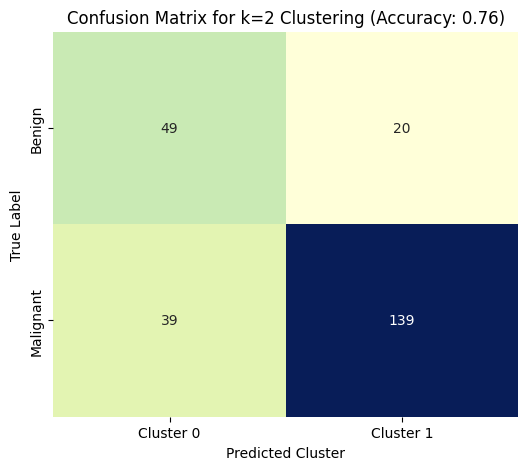

In [ ]:
# Confusion Matrix with Accuracy Calculation
true_labels = yTest.tolist()
predicted_labels = yPred.tolist()

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
accuracy = accuracy_score(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for k=2 Clustering (Accuracy: {accuracy:.2f})')
plt.show()

In [ ]:
# Average Precision

from sklearn.metrics import average_precision_score
averagePrecision = average_precision_score(true_labels, predicted_labels)
print(averagePrecision)

0.8405673394850282


The average precision of our model was high, meaning that the model is good at predicting true positives, which for cancer prediction is very important.

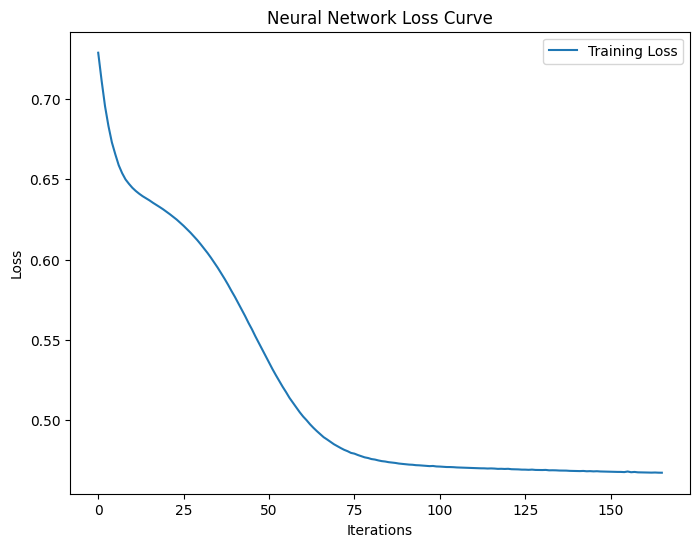

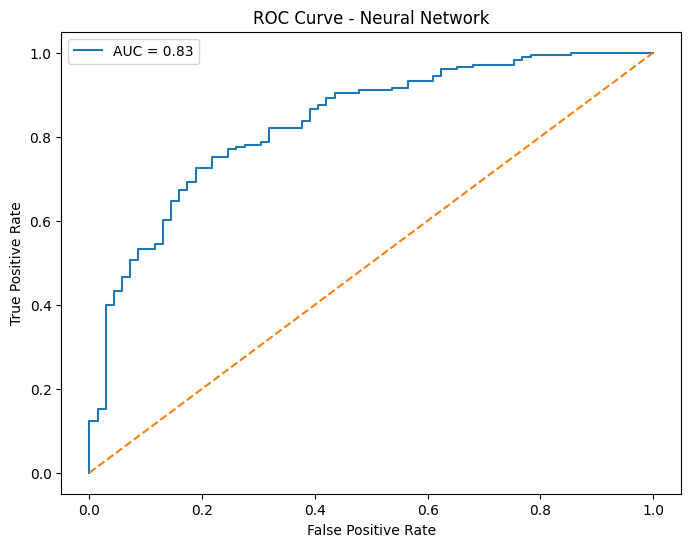

Neural Network Accuracy: 0.7611336032388664
Neural Network ROC AUC Score: 0.833170493404983
Neural Network F1 Score: 0.8249258160237388
Neural Network Precision: 0.8742138364779874
Neural Network Recall: 0.7808988764044944


In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

# Neural Network Metrics
nn_accuracy = accuracy_score(yTest, yPred)
nn_roc_auc = roc_auc_score(yTest, nn.predict_proba(xTest)[:, 1])
nn_f1 = f1_score(yTest, yPred)
nn_precision = precision_score(yTest, yPred)
nn_recall = recall_score(yTest, yPred)

# Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(nn.loss_curve_, label="Training Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Neural Network Loss Curve")
plt.legend()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(yTest, nn.predict_proba(xTest)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.show()

# Print Metrics
print(f"Neural Network Accuracy: {nn_accuracy}")
print(f"Neural Network ROC AUC Score: {nn_roc_auc}")
print(f"Neural Network F1 Score: {nn_f1}")
print(f"Neural Network Precision: {nn_precision}")
print(f"Neural Network Recall: {nn_recall}")

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        82
           1       0.77      0.81      0.79       165

    accuracy                           0.72       247
   macro avg       0.68      0.67      0.67       247
weighted avg       0.71      0.72      0.71       247



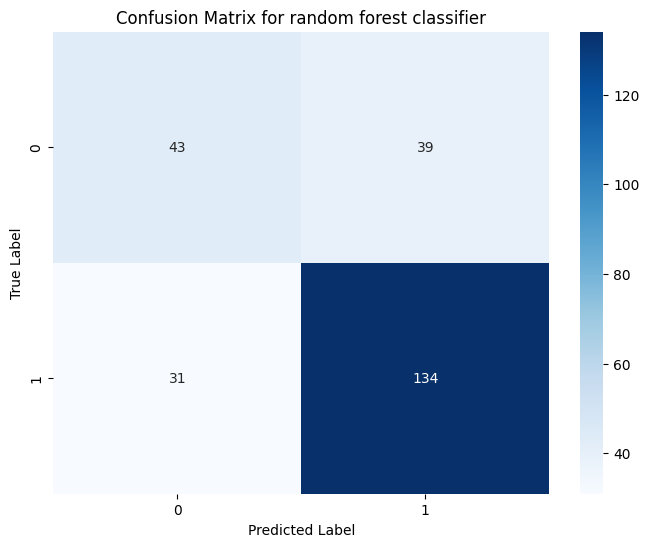

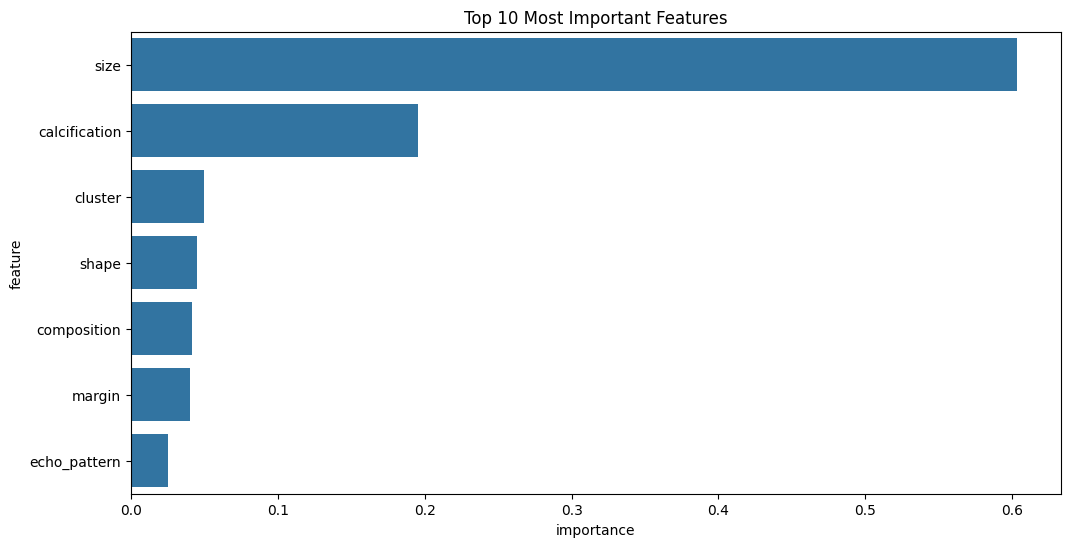


Cross-validation scores: [0.72081218 0.69543147 0.69543147 0.72588832 0.73096447]
Average CV score: 0.7137055837563452

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.7421319796954314

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.51      0.57        82
           1       0.78      0.85      0.82       165

    accuracy                           0.74       247
   macro avg       0.71      0.68      0.69       247
weighted avg       0.73      0.74      0.73       247



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



X = normStdDataFrameCleaned
y = dataFrame['mal']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


y_pred = rf_model.predict(X_test_scaled)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for random forest classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# cross validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

# hyperparameter
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Final Prediction
best_model = grid_search.best_estimator_
final_predictions = best_model.predict(X_test_scaled)

print("\nFinal Model Classification Report:")
print(classification_report(y_test, final_predictions))

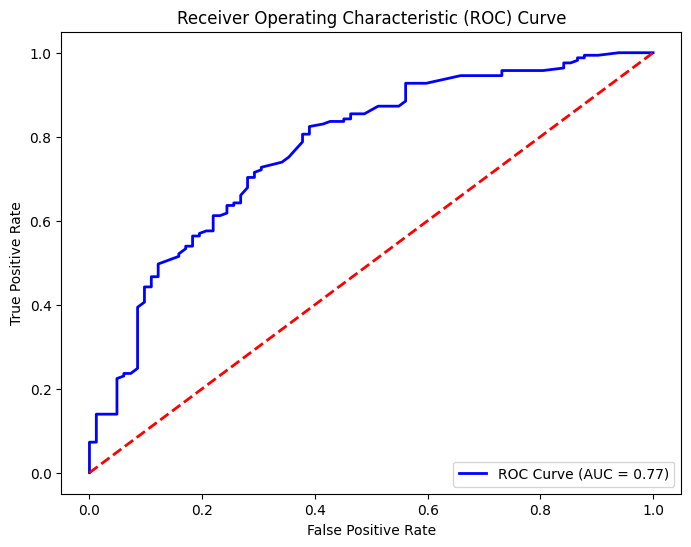

In [ ]:
#Plot Roc-Auc Curve
from sklearn.metrics import roc_curve, auc

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
rf_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


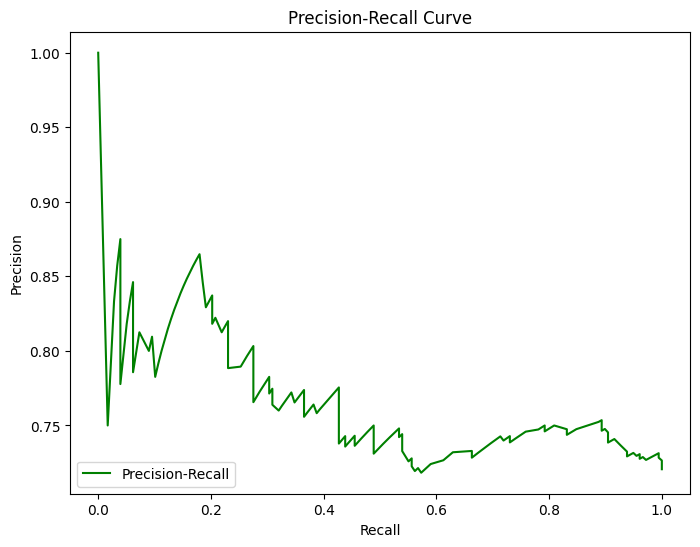

In [ ]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(yTest, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.show()

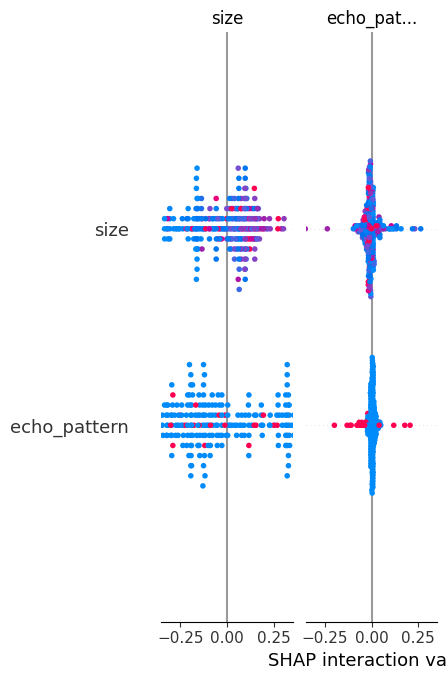

Neural Network CV ROC AUC: 0.839 ± 0.031
Random Forest CV ROC AUC: 0.819 ± 0.019


In [ ]:
from sklearn.model_selection import cross_val_score
import shap

# SHAP Summary Plot
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

# Neural Network Cross-Validation
cv_scores = cross_val_score(nn, xTrain, yTrain, cv=5, scoring="roc_auc")
print(f"Neural Network CV ROC AUC: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(rf_model, xTrain, yTrain, cv=5, scoring="roc_auc")
print(f"Random Forest CV ROC AUC: {cv_scores_rf.mean():.3f} ± {cv_scores_rf.std():.3f}")

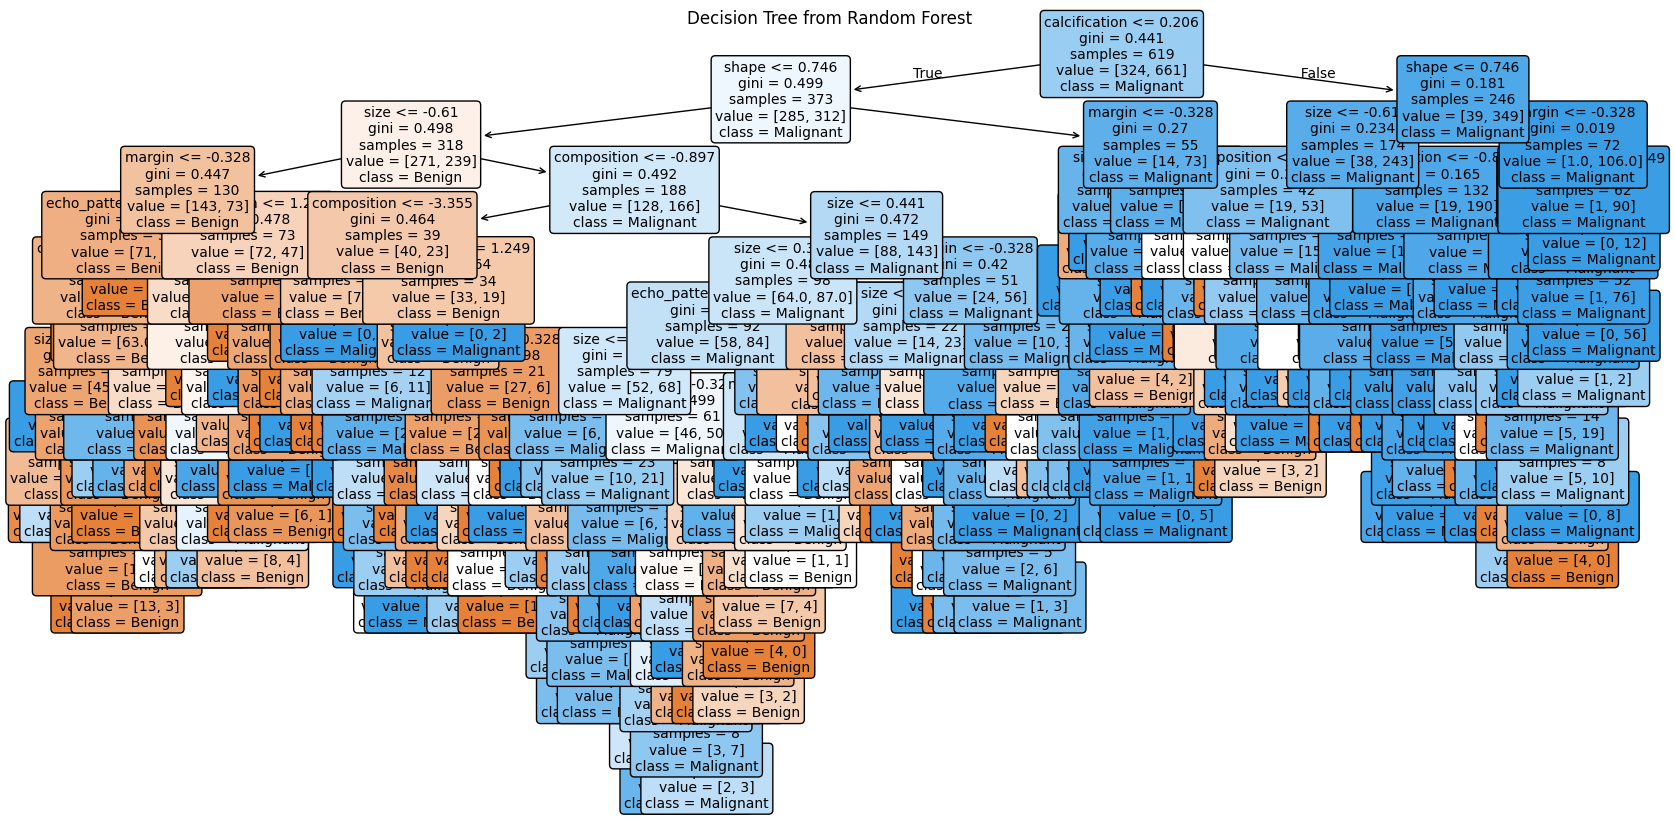

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one tree from the forest
single_tree = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree,
          feature_names=X.columns,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


            Model  Accuracy   ROC AUC  F1 Score  Precision    Recall
0  Neural Network  0.761134   0.83317  0.824926   0.874214  0.780899
1   Random Forest  0.631579  0.772099  0.740741   0.751445  0.730337
2         K-Means  0.362825       N/A  0.496472   0.522973  0.472527


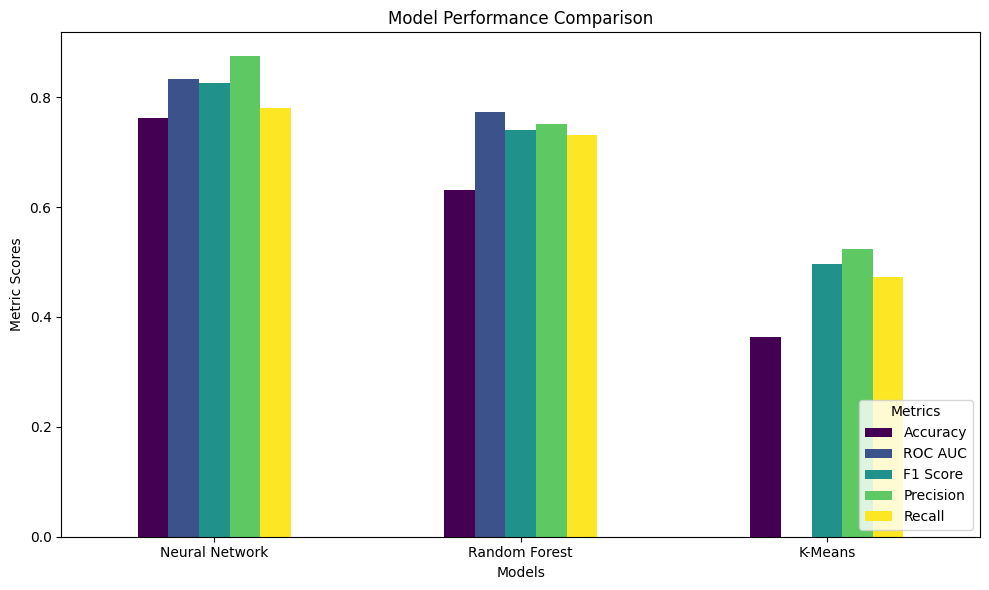

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
import pandas as pd

# Random Forest Metrics
rf_accuracy = accuracy_score(yTest, y_pred)
# rf_roc_auc = roc_auc_score(yTest, rf_model.predict_proba(xTest)[:, 1])
rf_f1 = f1_score(yTest, y_pred)
rf_precision = precision_score(yTest, y_pred)
rf_recall = recall_score(yTest, y_pred)

# No ROC AUC for K-Means
kmeans_roc_auc = "N/A"

# Consolidate Results
results_summary = pd.DataFrame({
    "Model": ["Neural Network", "Random Forest", "K-Means"],
    "Accuracy": [nn_accuracy, rf_accuracy, kmeans_accuracy],
    "ROC AUC": [nn_roc_auc, rf_roc_auc, kmeans_roc_auc],
    "F1 Score": [nn_f1, rf_f1, kmeans_f1],
    "Precision": [nn_precision, rf_precision, kmeans_precision],
    "Recall": [nn_recall, rf_recall, kmeans_recall]
})

# Display Results
print(results_summary)

# Convert ROC AUC to numeric for visualization (set 0 for K-Means)
results_summary["ROC AUC"] = results_summary["ROC AUC"].apply(lambda x: x if isinstance(x, (int, float)) else 0)

# Plot Comparison
results_summary.set_index("Model").plot(kind="bar", figsize=(10, 6), colormap="viridis", rot=0)
plt.title("Model Performance Comparison")
plt.ylabel("Metric Scores")
plt.xlabel("Models")
plt.legend(loc="lower right", title="Metrics")
plt.tight_layout()
plt.show()